<a href="https://colab.research.google.com/github/JackBenadon/DS340W_Group22/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [306]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

In [307]:
df = pd.read_csv('CardiacPrediction.csv')
df

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.4,174.0,...,5.56,1.39,4.7,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.5,178.3,...,7.21,1.08,5.5,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.2,180.0,...,4.03,0.98,5.2,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.6,157.7,...,8.12,1.28,7.6,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.5,166.2,...,4.50,1.04,5.8,1,1,1,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37074,93691,1,25,10,1.59,92,112,76,39.2,136.5,...,4.14,1.27,5.8,2,2,1,2,1,2,0
37075,93695,2,76,4,1.43,78,112,46,59.1,165.8,...,3.62,1.76,5.6,2,2,1,2,2,2,0
37076,93697,2,80,7,2.97,74,146,58,71.7,152.2,...,6.62,2.90,5.7,2,2,1,2,2,2,0
37077,93700,1,35,1,0.00,76,106,66,78.2,173.3,...,3.72,1.09,5.2,2,2,1,2,2,1,0


## Exploratory Data Analysis

In [308]:
#Removes unimportant variables as shown in Research Paper 2
df.drop(['SEQN','Annual-Family-Income','Height','Ratio-Family-Income-Poverty','X60-sec-pulse',
          'Health-Insurance','Lymphocyte','Monocyte','Eosinophils','Total-Cholesterol','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.','Hematocrit','Segmented-Neutrophils'], axis = 1, inplace=True)

In [309]:
#All Columns in the dataset
df.columns

Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'Body-Mass-Index',
       'White-Blood-Cells', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Red-Cell-Distribution-Width', 'Albumin', 'ALP', 'AST', 'ALT',
       'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH',
       'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid', 'Triglycerides',
       'HDL', 'Glycohemoglobin', 'Vigorous-work', 'Moderate-work', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [310]:
heartDiseaseCount = (df['CoronaryHeartDisease'] == 1).sum()
noHeartDiseaseCount = (df['CoronaryHeartDisease'] == 0).sum()
print(f'People with heart disease: {heartDiseaseCount} \nPeople without heart disease: {noHeartDiseaseCount}')

People with heart disease: 1508 
People without heart disease: 35571


In [311]:
#importing packages for vizualizations
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'CardiacPrediction.csv', 'drive', 'sample_data']


In [312]:
print(df.corr()["CoronaryHeartDisease"].sort_values(ascending=False))

CoronaryHeartDisease           1.000000
Age                            0.222649
Creatinine                     0.114318
Glycohemoglobin                0.101517
Uric.Acid                      0.098907
Glucose                        0.086754
Systolic                       0.080224
Red-Cell-Distribution-Width    0.074316
LDH                            0.072073
Vigorous-work                  0.054506
Triglycerides                  0.034160
Bilirubin                      0.030407
Weight                         0.029003
ALP                            0.028672
Moderate-work                  0.022683
Body-Mass-Index                0.022211
GGT                            0.014732
White-Blood-Cells              0.011565
Mean-Platelet-Vol              0.008768
AST                            0.008149
Basophils                     -0.000105
ALT                           -0.004512
Mean-cell-Hemoglobin          -0.014665
Hemoglobin                    -0.015201
Iron                          -0.018252


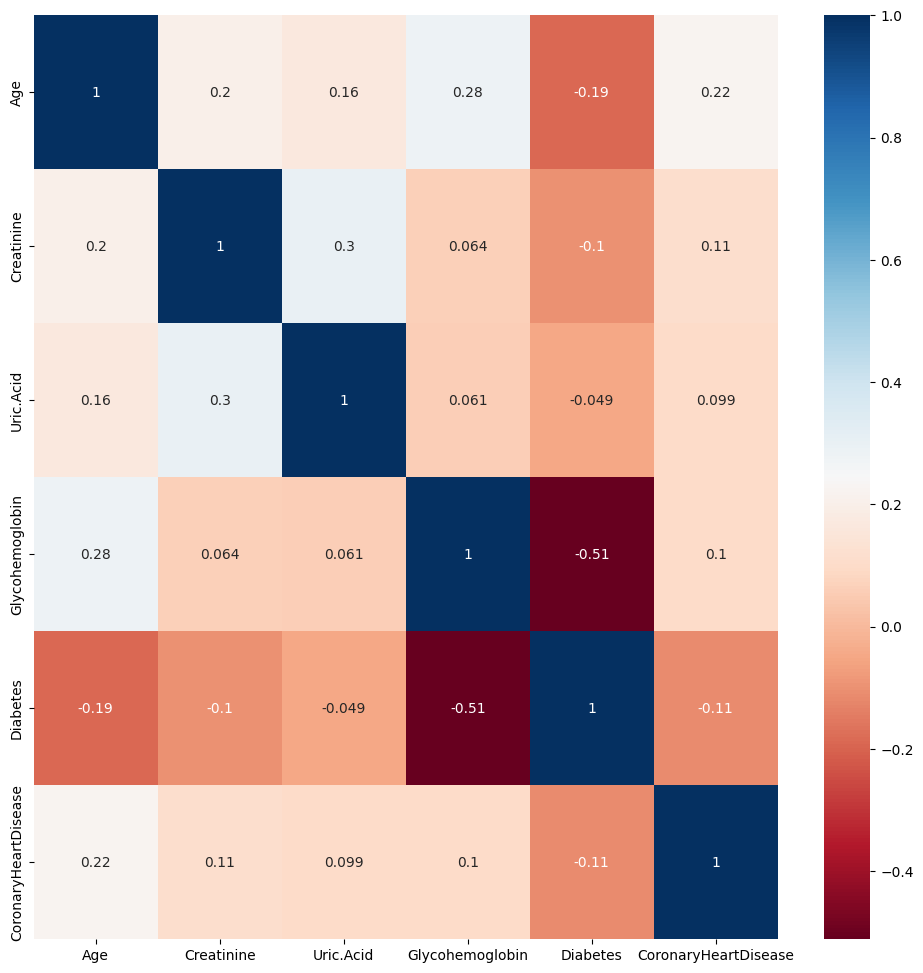

In [313]:
#find correlation matrix
corr_mat=df.corr()
#Select variables have more than 0.09 or less than -0.09 correlation with the target variable(CoronaryHeartDisease)
chosen_variable=corr_mat[abs(corr_mat["CoronaryHeartDisease"])>0.09].index
#plot the heatmap
plt.figure(figsize=(12,12))
ax = sns.heatmap(df[chosen_variable].corr(),annot=True,cmap='RdBu')

0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64


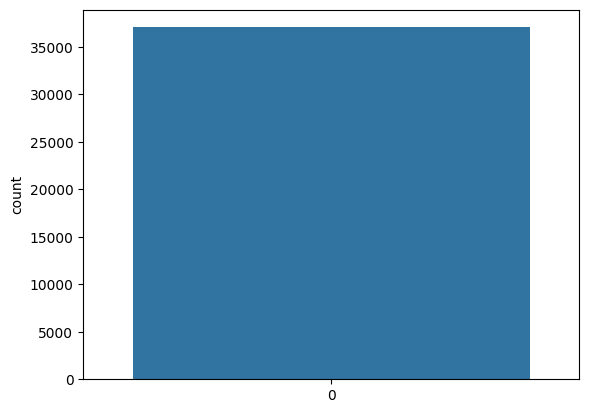

In [314]:
#Analysing the target variable
y = df["CoronaryHeartDisease"]

sns.countplot(y)

target_temp = df.CoronaryHeartDisease.value_counts()

print(target_temp)

<Axes: xlabel='Gender', ylabel='CoronaryHeartDisease'>

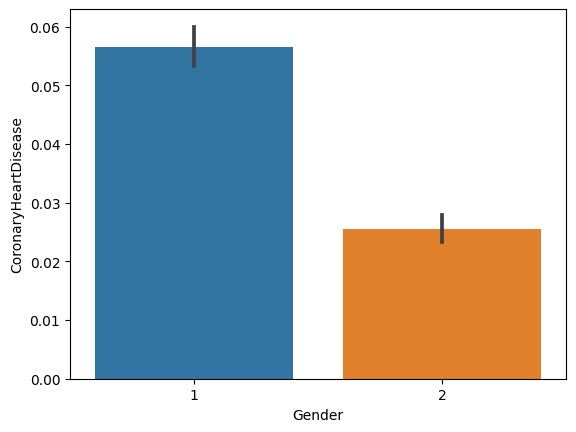

In [315]:
# analyzing gender in the dataset
df["Gender"].unique()

# 1 = Male
# 2 = Female
sns.barplot(x=df["Gender"], y=y)

In [316]:
#number of men and women
GenderIs1 = (df['Gender'] == 1).sum()
GenderIs2 = (df['Gender'] == 0).sum()
print(f'People with gender == 1: {heartDiseaseCount} \nPeople with gender == 2: {noHeartDiseaseCount}')

People with gender == 1: 1508 
People with gender == 2: 35571


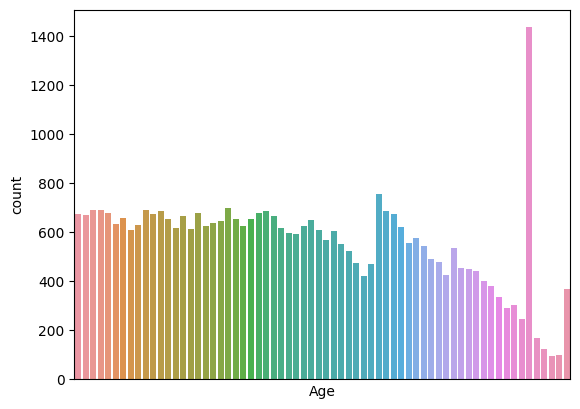

In [317]:
# Analyzing the age feature
df["Age"].unique()

# how many there are in the dataset
sns.countplot(x=df["Age"])
plt.xticks([])  # This line removes the x-axis tick labels
plt.show()

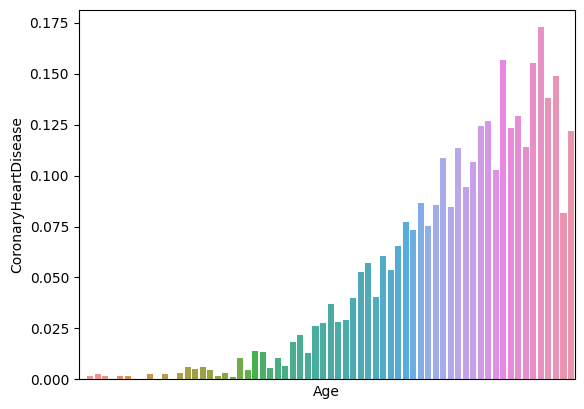

In [318]:
# the percentage who have heart disease
sns.barplot(x=df["Age"],y=y, errorbar=None)
plt.xticks([])
plt.show()

<Axes: xlabel='Diabetes', ylabel='CoronaryHeartDisease'>

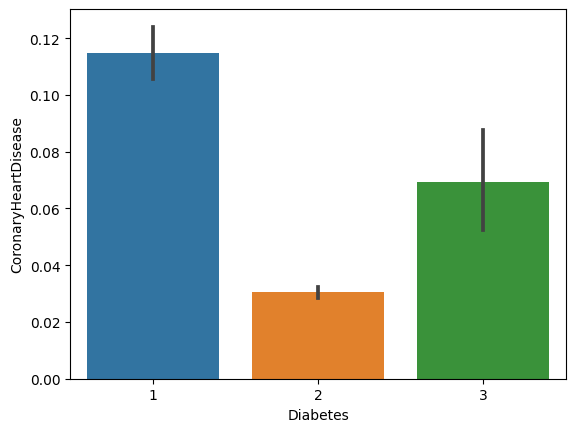

In [319]:
# The margin of error for some of the older ages is larger because of the small sample size, but the error bars hurt the understandability of the graph so I had to remove them.
# analyzing the diabetes feature
df["Diabetes"].unique()

sns.barplot(x=df["Diabetes"],y=y)

<Axes: xlabel='Creatinine', ylabel='Density'>

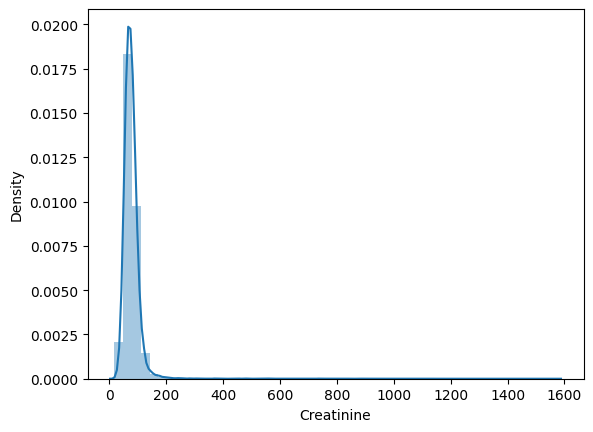

In [320]:
# explorting the density of the creatinine feature
sns.distplot(df['Creatinine'])

<Axes: xlabel='Glycohemoglobin', ylabel='Density'>

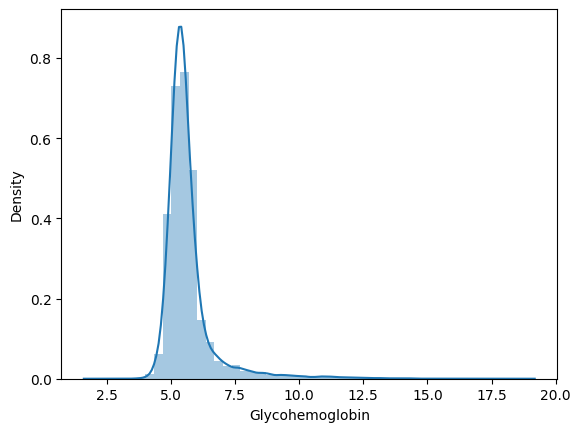

In [321]:
#exploring the density of the Glycohemoglobin feature
sns.distplot(df['Glycohemoglobin'])

<Axes: xlabel='Cholesterol', ylabel='Density'>

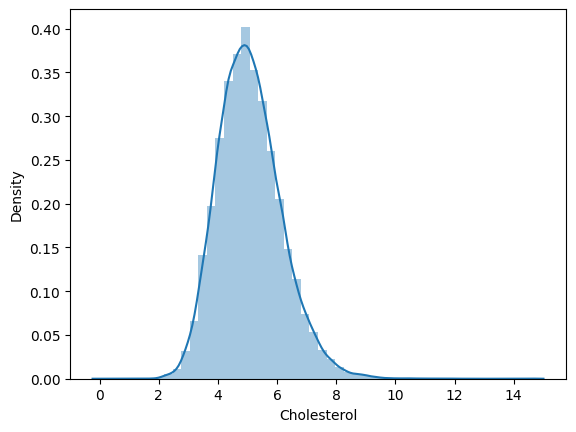

In [322]:
# exploring the density of the cholesterol feature
sns.distplot(df['Cholesterol'])

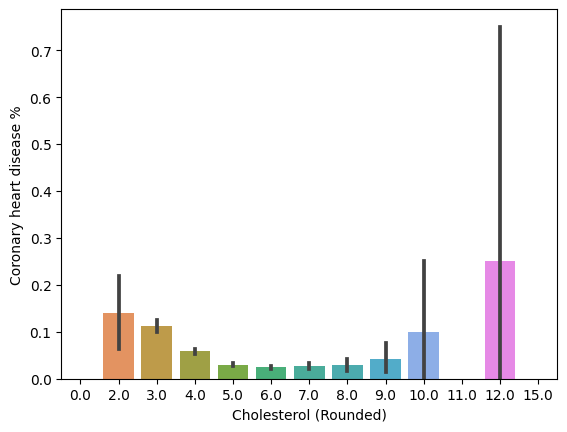

In [323]:
df["Cholesterol_Rounded"] = df["Cholesterol"].round()

# Create the bar plot
sns.barplot(x=df["Cholesterol_Rounded"], y=y)

# Set plot labels and title
plt.xlabel("Cholesterol (Rounded)")
plt.ylabel("Coronary heart disease %")

# Show the plot
plt.show()

## Balancing the Imbalanced Data

In [324]:
X = df.drop('CoronaryHeartDisease', axis=1)
y = df['CoronaryHeartDisease']

# undersampling the data
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X, y)


## LASSO for Feature Selection

In [326]:
# split into training and testing
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)
print("Validation set shapes:", X_valid.shape, y_valid.shape)

Training set shapes: (2111, 37) (2111,)
Testing set shapes: (452, 37) (452,)
Validation set shapes: (453, 37) (453,)


In [327]:
#Feature Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [328]:
# create the lasso model
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)

lasso_cv.fit(X_train, y_train)

print('The optimal alpha is', lasso_cv.alpha_)

# finding the predicted probability
y_pred_proba = lasso_cv.predict(X_test)
# converting to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)   # might need to lower threshold
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

The optimal alpha is 0.01
Accuracy: 0.8141592920353983


In [329]:
#Feature selection in Lasso
col_names = list(X.columns)
selected_features = [col_names[i] for i in range(len(col_names)) if lasso_cv.coef_[i] != 0]

lassoCoef = pd.Series(lasso_cv.coef_, index=X.columns)
print(f'The selected features are \n{lassoCoef[lassoCoef != 0]}')

The selected features are 
Gender                        -0.041864
Age                            0.229079
Diastolic                     -0.010533
Basophils                     -0.002089
Platelet-count                -0.010942
Red-Cell-Distribution-Width    0.019240
ALP                            0.002424
AST                           -0.001851
Cholesterol                   -0.053822
Creatinine                     0.006368
LDH                            0.023972
Uric.Acid                      0.016434
Triglycerides                  0.021954
HDL                           -0.005016
Glycohemoglobin                0.023935
Vigorous-work                  0.017240
Moderate-work                 -0.006237
Diabetes                      -0.023904
Blood-Rel-Diabetes            -0.011388
Blood-Rel-Stroke              -0.038460
Cholesterol_Rounded           -0.006298
dtype: float64


## Machine Learning Experiments

In [330]:
df_reduced = df[["CoronaryHeartDisease"] + selected_features]

df_reduced

,CoronaryHeartDisease,Gender,Age,Diastolic,Basophils,Platelet-count,Red-Cell-Distribution-Width,ALP,AST,Cholesterol,...,Uric.Acid,Triglycerides,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,Cholesterol_Rounded
0,0,1,77,56,0.5,214.0,13.7,62,19,5.250,...,362.8,1.298,1.39,4.7,3,3,2,2,2,5.0
1,0,1,49,83,0.4,209.0,13.1,63,22,7.160,...,404.5,3.850,1.08,5.5,1,1,2,2,2,7.0
2,0,1,37,99,0.6,357.0,13.6,63,17,3.900,...,339.0,1.581,0.98,5.2,2,1,2,1,1,4.0
3,0,1,70,66,0.4,228.0,14.4,103,24,7.940,...,410.4,3.635,1.28,7.6,3,3,1,1,2,8.0
4,0,1,81,61,0.4,160.0,12.4,110,23,4.420,...,368.8,0.756,1.04,5.8,1,1,2,2,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37074,0,1,25,76,0.6,253.0,13.3,67,34,4.189,...,428.3,1.264,1.27,5.8,2,2,2,1,2,4.0
37075,0,2,76,46,0.9,135.0,13.6,50,22,3.646,...,368.8,0.948,1.76,5.6,2,2,2,2,2,4.0
37076,0,2,80,58,0.8,172.0,16.9,54,25,6.801,...,273.6,1.095,2.90,5.7,2,2,2,2,2,7.0
37077,0,1,35,66,0.6,194.0,13.0,140,73,3.672,...,237.9,0.937,1.09,5.2,2,2,2,2,1,4.0


In [331]:
X = df.drop('CoronaryHeartDisease', axis=1)
y = df['CoronaryHeartDisease']

# undersampling the data
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

# split into training and testing
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)
print("Validation set shapes:", X_valid.shape, y_valid.shape)

Training set shapes: (2111, 37) (2111,)
Testing set shapes: (452, 37) (452,)
Validation set shapes: (453, 37) (453,)


In [332]:
#Feature Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [333]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

### Logistic Regression

In [334]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.754424778761062
Precision: 0.7248908296943232
Recall: 0.7757009345794392
F1-Score: 0.7494356659142213


##### Validation

In [335]:
y_pred = lr.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7924944812362031
Precision: 0.7860082304526749
Recall: 0.8197424892703863
F1-Score: 0.8025210084033614


In [336]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Naive Bayes

In [337]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.75
Precision: 0.7348837209302326
Recall: 0.7383177570093458
F1-Score: 0.7365967365967365


##### Validation

In [338]:
y_pred = nb.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7660044150110376
Precision: 0.777292576419214
Recall: 0.7639484978540773
F1-Score: 0.7705627705627706


In [339]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### SVM

In [340]:
sv = SVC(C=5, degree=1, gamma=0.001, kernel='poly')

sv.fit(X_train, y_train)

y_pred = sv.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7853982300884956
Precision: 0.7447698744769874
Recall: 0.8317757009345794
F1-Score: 0.7858719646799117


##### Validation

In [341]:
y_pred = sv.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7991169977924945
Precision: 0.784
Recall: 0.8412017167381974
F1-Score: 0.8115942028985508


In [342]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### K-Nearest Neighbors

In [343]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7389380530973452
Precision: 0.7242990654205608
Recall: 0.7242990654205608
F1-Score: 0.7242990654205608


##### Validation

In [344]:
y_pred = knn.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7726269315673289
Precision: 0.7954545454545454
Recall: 0.7510729613733905
F1-Score: 0.7726269315673289


In [345]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Random Forest

In [346]:
rf = RandomForestClassifier(n_estimators=1800, max_depth=20)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7853982300884956
Precision: 0.7489361702127659
Recall: 0.822429906542056
F1-Score: 0.7839643652561247


##### Validation

In [347]:
y_pred = rf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8057395143487859
Precision: 0.7799227799227799
Recall: 0.8669527896995708
F1-Score: 0.8211382113821138


In [348]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### XGBoost

In [349]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, max_depth=9)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7743362831858407
Precision: 0.7413793103448276
Recall: 0.8037383177570093
F1-Score: 0.7713004484304932


##### Validation

In [350]:
y_pred = xgb_model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7858719646799117
Precision: 0.7764227642276422
Recall: 0.8197424892703863
F1-Score: 0.7974947807933195


In [351]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Model Metric Comparison

In [352]:
# create a table/chart with the metrics of all the models and figure out which performs the best
data = [accuracy_list, precision_list, recall_list, f1_list]

df_metrics = pd.DataFrame(data=data, columns=['Logistic Regression', 'Naive Bayes', 'SVM', 'K-Nearest Neighbors', 'Random Forest', 'XGBoost'],
                          index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_metrics

,Logistic Regression,Naive Bayes,SVM,K-Nearest Neighbors,Random Forest,XGBoost
Accuracy,0.792494,0.766004,0.799117,0.772627,0.805740,0.785872
Precision,0.786008,0.777293,0.784000,0.795455,0.779923,0.776423
Recall,0.819742,0.763948,0.841202,0.751073,0.866953,0.819742
F1-Score,0.802521,0.770563,0.811594,0.772627,0.821138,0.797495
